# Instructions:

1. Download the wine dataset from the UCI Machine Learning Repository

2. Load the dataset into a Pandas dataframe.

3. Split the dataset into features and target variables.

4. Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.

5. Implement PCA on the preprocessed dataset using the scikit-learn library.

6. Determine the optimal number of principal components to retain based on the explained variance ratio.

7. Visualise the results of PCA using a scatter plot.

8. Perform clustering on the PCA-transformed data using K-Means clustering algorithm.

9. Interpret the results of PCA and clustering analysis.

## 1. Download the wine dataset from the UCI Machine Learning Repository

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
wine = fetch_ucirepo(id=109) 

## Information on Dataset

In [3]:
print(wine.metadata.keys())  # metadata 

dict_keys(['uci_id', 'name', 'repository_url', 'data_url', 'abstract', 'area', 'tasks', 'characteristics', 'num_instances', 'num_features', 'feature_types', 'demographics', 'target_col', 'index_col', 'has_missing_values', 'missing_values_symbol', 'year_of_dataset_creation', 'last_updated', 'dataset_doi', 'creators', 'intro_paper', 'additional_info'])


In [4]:
wine.metadata.additional_info.keys()  # additional info

dict_keys(['summary', 'purpose', 'funded_by', 'instances_represent', 'recommended_data_splits', 'sensitive_data', 'preprocessing_description', 'variable_info', 'citation'])

In [5]:
print(wine.metadata.additional_info.summary)  #summary of data set

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 

I think that the initial data set had around 30 variables, but for some reason I only have the 13 dimensional version. I had a list of what the 30 or so variables were, but a.)  I lost it, and b.), I would not know which 13 variables are included in the set.

The attributes are (dontated by Riccardo Leardi, riclea@anchem.unige.it )
1) Alcohol
2) Malic acid
3) Ash
4) Alcalinity of ash  
5) Magnesium
6) Total phenols
7) Flavanoids
8) Nonflavanoid phenols
9) Proanthocyanins
10)Color intensity
11)Hue
12)OD280/OD315 of diluted wines
13)Proline 

In a classification context, this is a well posed problem with "well behaved" class structures. A good data set for first testing of a new classifier, but not very challenging.           


In [6]:
wine.data.headers  #Column names

Index(['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       '0D280_0D315_of_diluted_wines', 'Proline', 'class'],
      dtype='object')

## 2. Load the dataset into a Pandas dataframe.

In [98]:
x = wine.data.features 
y = wine.data.targets 

df=pd.DataFrame(x,columns=wine.data.headers)
df['class']=y
df

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


## 3. Split the dataset into features and target variables

In [142]:
xtrain=df.drop('class', axis=1)
y=df['class']

## 4. Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.

In [143]:
df.isnull().sum()

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
class                           0
dtype: int64

- no missing values

In [144]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)

## 5. Implement PCA on the preprocessed dataset using the scikit-learn library.

In [147]:
from sklearn.decomposition import PCA

pca=PCA()

x_train_pca=pca.fit_transform(xtrain)

## 6. Determine the optimal number of principal components to retain based on the explained variance ratio.

In [148]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()
n_components = len(cumulative_variance_ratio[cumulative_variance_ratio <= 0.95]) + 1
n_components

10

In [149]:
pca=PCA(n_components=2)

x_train_pca=pca.fit_transform(xtrain)


## 7. Visualise the results of PCA using a scatter plot.

<Axes: >

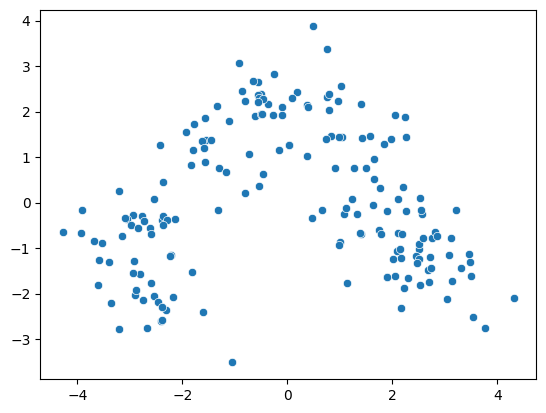

In [150]:
# scatter plot for first two fatures

sns.scatterplot(x=x_train_pca[:,0], y=x_train_pca[:,1])

## 8. Perform clustering on the PCA-transformed data using K-Means clustering algorithm.

In [151]:
from sklearn.cluster import KMeans

wcss=[]

for k in range(1, len(x_train_pca)//3):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(x_train_pca)
    wcss.append(kmeans.inertia_)

In [152]:
wcss

[1282.1026695794833,
 628.788350755478,
 259.50938075119353,
 193.25092890842222,
 155.72502450522265,
 122.71255113908825,
 99.24814548387045,
 89.4731622589509,
 81.7269480661701,
 72.41944201661902,
 65.6449493402105,
 58.32068498637807,
 53.59825361082595,
 51.11752407323729,
 46.677700804010634,
 43.60835784248983,
 41.144166370730495,
 37.95962070716457,
 37.10638882533866,
 35.05203559094121,
 32.665290105118,
 30.42336441408033,
 28.574099708857197,
 26.950661302568754,
 25.99562077863462,
 25.23773518658781,
 23.616565610083306,
 22.16120708358429,
 21.603290610077778,
 20.357933326445,
 19.501311815061637,
 19.166658268517775,
 17.771190200275093,
 17.220463868674564,
 16.186396971301185,
 16.29050107436283,
 15.629157532872942,
 14.315491912094634,
 13.575644335045919,
 12.925683957758746,
 13.166653693510096,
 12.559106701371142,
 11.60234389141885,
 11.860955548544505,
 10.700082829838326,
 10.348609222494852,
 10.011982165147048,
 9.921965721629359,
 9.434990340503543,
 9

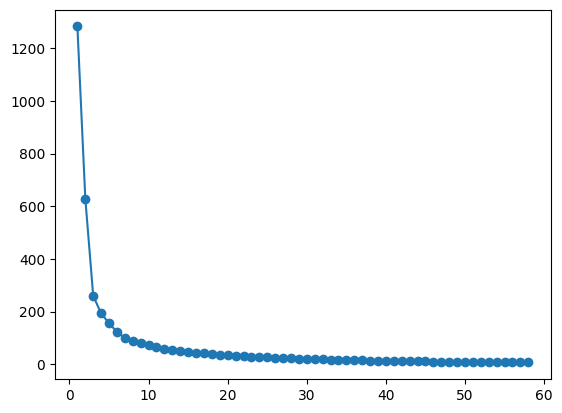

In [153]:
plt.scatter(range(1, len(x_train_pca)//3), wcss)
plt.plot(range(1, len(x_train_pca)//3), wcss)

In [154]:
from kneed import KneeLocator

k1=KneeLocator(range(1,len(x_train_pca)//3),wcss, curve='convex', direction='decreasing')
k1.elbow

7

- We see that k=7 is the best value for k

In [161]:
model=KMeans(n_clusters=7)
model.fit(x_train_pca,ytrain)

KMeans(n_clusters=7)

## 9. Interpret the results of PCA and clustering analysis.

In [162]:
from sklearn.metrics import silhouette_score

silhouette_score(x_train_pca,model.labels_)

0.42357060607218683

In [164]:
maxs=0
maxi=0
for i in range(2,11):
    model=KMeans(n_clusters=i)
    model.fit(x_train_pca)
    sc=silhouette_score(x_train_pca,model.labels_)
    if(maxs<sc):
        maxs=sc
        maxi=i
print(maxs,i)

0.5610505693103247 10


- With pca n_components=10 , which was the best explained variance, the model performed poorly due to curse of dimensionality
- Thus lower pca with n_components=2 performs better

- The model with n_cluster=7 performs poorly because of overfitting and improper elbow due to complication in data
- Thus model with n_clusters=3 performs better